In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
df.Age.head(5)

0    19
1    35
2    26
3    27
4    19
Name: Age, dtype: int64

In [7]:
df.Age.value_counts().head(5)

35    32
37    20
26    16
41    16
42    16
Name: Age, dtype: int64

In [8]:
df.EstimatedSalary.value_counts().head(5)

72000    12
80000    11
79000    10
75000     9
71000     9
Name: EstimatedSalary, dtype: int64

In [9]:
df.Purchased.value_counts() #find out the number of purchased and not purchased

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
pd.crosstab(df.Age, df.Purchased).head()

Purchased,0,1
Age,,
18,5,0
19,7,0
20,7,0
21,4,0
22,5,0


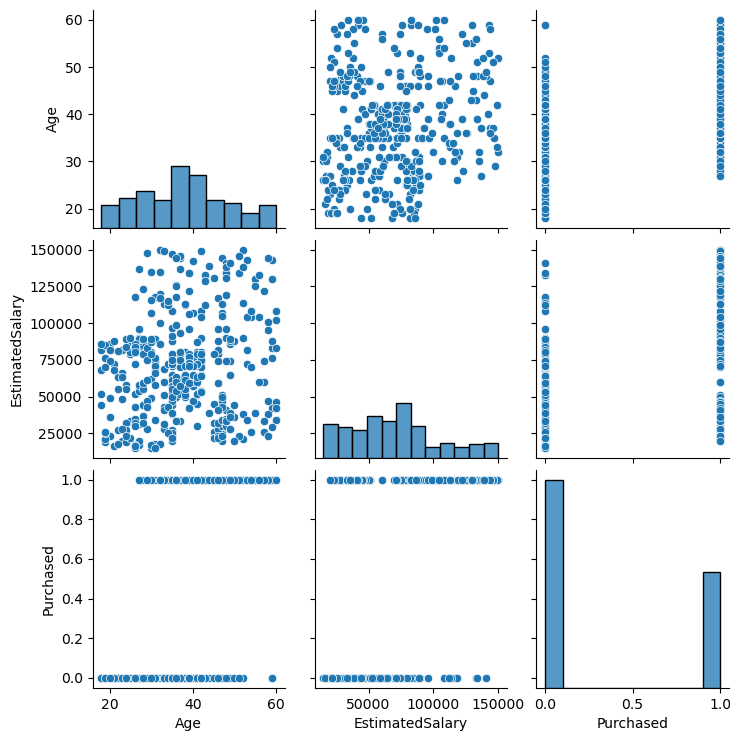

In [11]:
sns.pairplot(df) #visualize the dataframe

<Axes: >

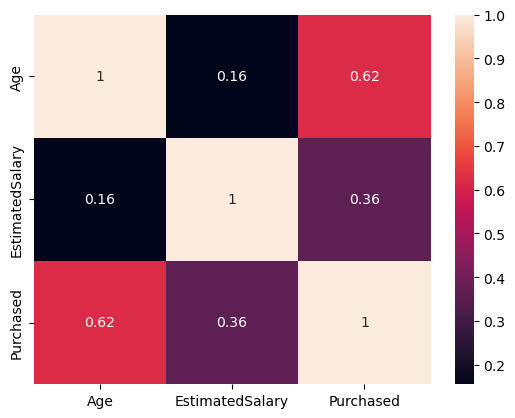

In [12]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Age frequency')

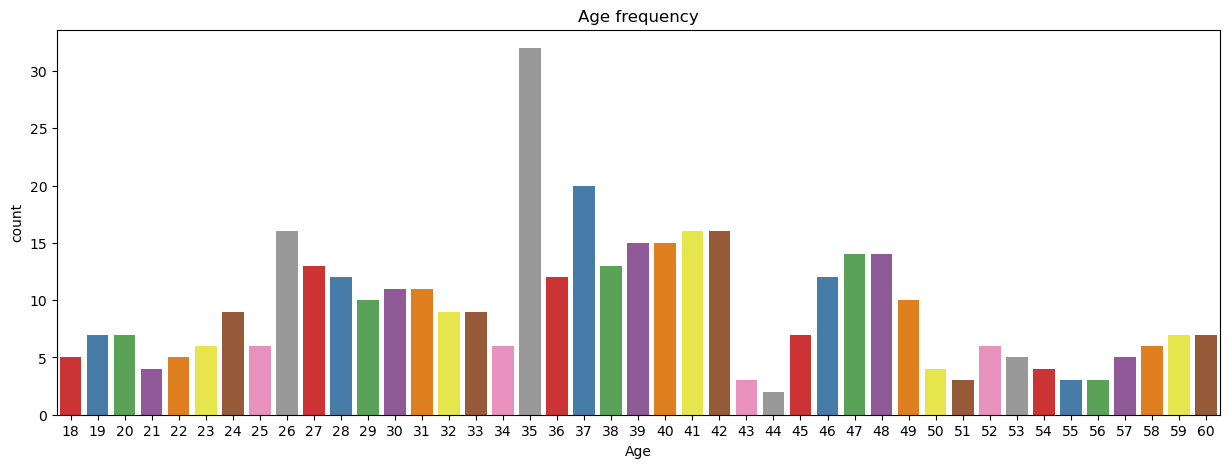

In [13]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x=df["Age"], palette='Set1')
plt.title('Age frequency')

Text(0.5, 1.0, 'Purchased frequency')

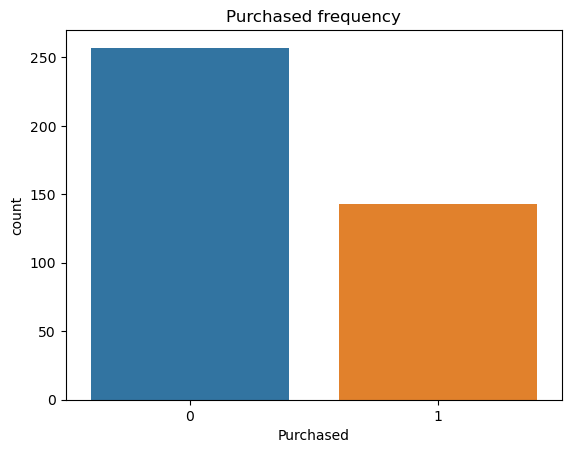

In [14]:
sns.countplot(x=df["Purchased"])
plt.title('Purchased frequency')

Text(0.5, 1.0, 'Estimated Salary frequency')

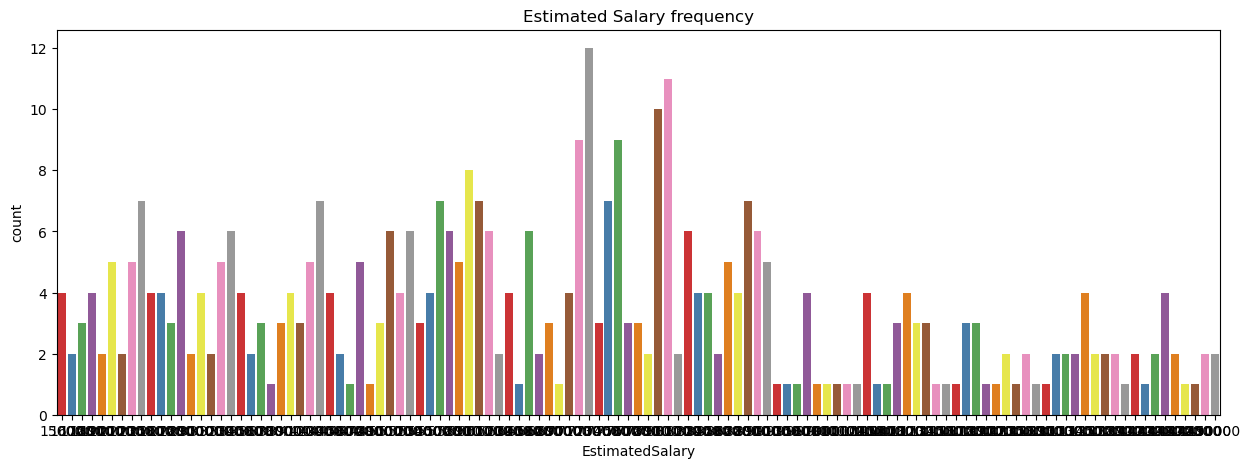

In [15]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x=df["EstimatedSalary"], palette='Set1')
plt.title("Estimated Salary frequency")


Text(0.5, 1.0, 'Age Frequency')

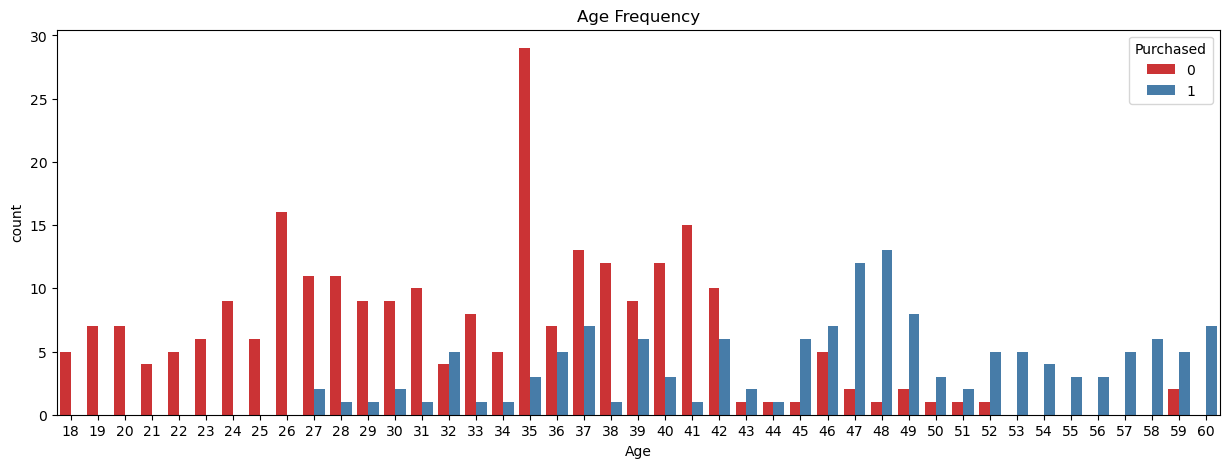

In [16]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x=df['Age'], hue=df['Purchased'], palette='Set1')
plt.title('Age Frequency')

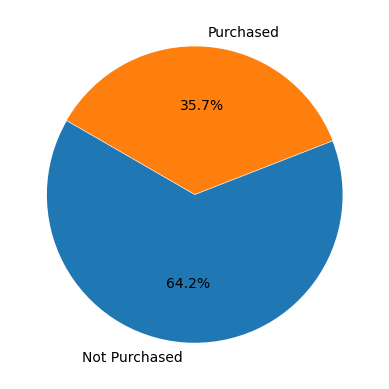

In [17]:
plt.pie(x=df.Purchased.value_counts(),
        startangle=150,
        explode=(0.005,0),
        autopct='%1.1f%%',
        shadow=False,
        labels=['Not Purchased','Purchased'])
plt.show()

Future Engineering

In [18]:
#categorizing age into youth, old and adult in age_category

df['Age_category'] = ['youth' if 18<=Age<=30
                      else 
                      'adult'
                     if 31<=Age<=45
                     else
                     'old'
                     if 46<=Age<=60
                     else
                     None for Age in list(df['Age'].values)] 

In [19]:
df.Age_category.value_counts()

adult    186
youth    111
old      103
Name: Age_category, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

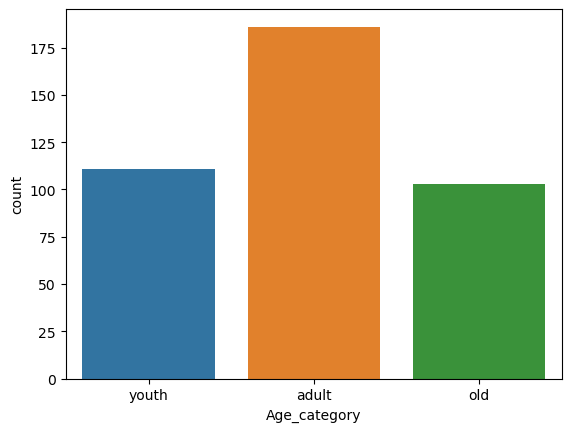

In [20]:
sns.countplot(x=df["Age_category"])

In [21]:
#categorizing EstimatedSalary to Low, Medium and High as Salary_category
df["Salary_category"] = pd.qcut(df.EstimatedSalary, 3, labels=['Low', 'Medium', 'High'])
df.Salary_category.value_counts()

Medium    138
Low       134
High      128
Name: Salary_category, dtype: int64

<Axes: xlabel='Salary_category', ylabel='count'>

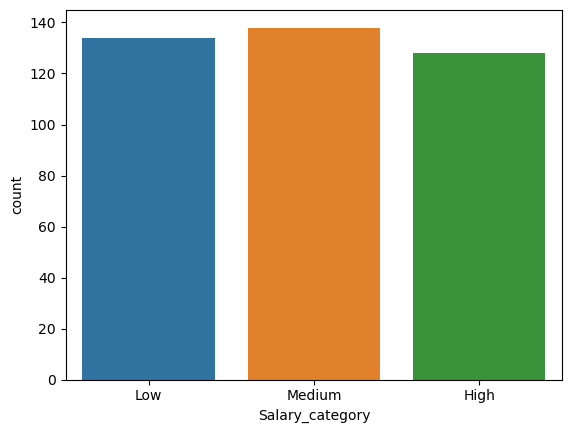

In [22]:
sns.countplot(x=df['Salary_category'])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Age_category = le.fit_transform(df.Age_category)
df.Salary_category = le.fit_transform(df.Salary_category)

In [24]:
df['Age category'] = le.fit_transform(df['Age_category'])
df['Salary category'] = le.fit_transform(df['Salary_category'])

# Model building

In [25]:
X = df[["Age", "EstimatedSalary", "Age_category", "Salary_category"]]
y = df["Purchased"]

In [26]:
#split dataset into train, test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Model/Algorithm: Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

#accuracy_score, recall, Precision scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def display_confusion_matrix(test, pred, model_name=""):
    cmatrix = confusion_matrix(test, pred)
    ax = plt.subplot()
    sns.heatmap(cmatrix, annot=True, ax=ax, cbar=False)
    plt.title('Confusion matrix for ' + str(model_name) + '\n')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predicted')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()
    
  

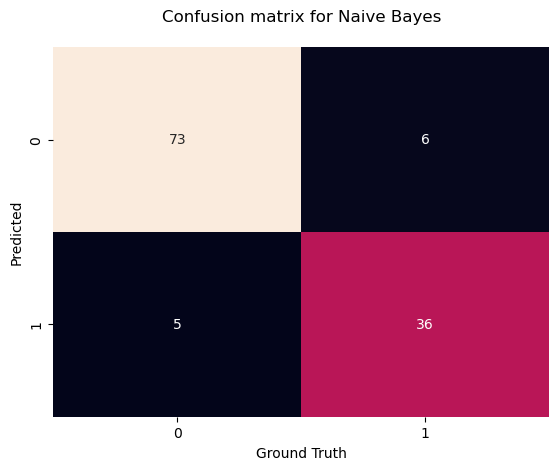

In [27]:
display_confusion_matrix(y_test,nb_pred, 'Naive Bayes')


In [28]:
print('Accuracy score:', accuracy_score(y_test, nb_pred)) #calculates and prints the accuracy score, which measures the overall correctness of the model's predictions.
print('Precision score:', precision_score(y_test, nb_pred)) #calculates and prints the precision score, which measures the ability of the model to correctly identify positive instances.
print('Recall score:', recall_score(y_test, nb_pred)) #calculates and prints the recall score, which measures the model's ability to correctly identify all positive instances.
print('F1 score:', f1_score(y_test, nb_pred)) #calculates and prints the F1 score, which is the harmonic mean of precision and recall and provides a balanced measure of a model's performance.
print('Classification report:', classification_report(y_test, nb_pred)) #prints a comprehensive classification report that includes precision, recall, F1 score, and support for each class, as well as weighted averages

Accuracy score: 0.9083333333333333
Precision score: 0.8571428571428571
Recall score: 0.8780487804878049
F1 score: 0.8674698795180722
Classification report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.86      0.88      0.87        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



In [29]:
accuracy = nb_classifier.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9083333333333333


# Explanation of the Naive Bayes Model
According to my Classification report:

The report provides a detailed summary of precision, recall, F1 score, and support for each class (0 and 1) in my classification problem.

For class 0 (often referred to as the negative class):

- Precision: Approximately 94%. This means that when the model predicted class 0, it was correct about 94% of the time.
- Recall: Approximately 92%. This indicates that the model correctly identified about 92% of the actual class 0 instances.
- F1-score: Approximately 93%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 0 is 79.

For class 1 (often referred to as the positive class):

- Precision: Approximately 86%. This means that when the model predicted class 1, it was correct about 86% of the time.
- Recall: Approximately 88%. This indicates that the model correctly identified about 88% of the actual class 1 instances.
- F1-score: Approximately 87%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 1 is 41.

*In summary, an accuracy score of 0.9083(90.8%) indicates that the Naive Bayes classifier has a relatively high level of accuracy in classifying instances, and it correctly predicted the class labels for the vast majority of the test dataset. This is a positive outcome and suggests that the model is performing well in terms of accuracy*

# Model 2/Algorithm: Support Vector Machine

In [30]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)
sv_pred = sv_classifier.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, sv_pred)) #calculates and prints the accuracy score, which measures the overall correctness of the model's predictions.
print('Precision score:', precision_score(y_test, sv_pred)) #calculates and prints the precision score, which measures the ability of the model to correctly identify positive instances.
print('Recall score:', recall_score(y_test, sv_pred)) #calculates and prints the recall score, which measures the model's ability to correctly identify all positive instances.
print('F1 score:', f1_score(y_test, sv_pred)) #calculates and prints the F1 score, which is the harmonic mean of precision and recall and provides a balanced measure of a model's performance.
print('Classification report:', classification_report(y_test, sv_pred)) #prints a comprehensive classification report that includes precision, recall, F1 score, and support for each class, as well as weighted averages

Accuracy score: 0.7833333333333333
Precision score: 0.8947368421052632
Recall score: 0.4146341463414634
F1 score: 0.5666666666666667
Classification report:               precision    recall  f1-score   support

           0       0.76      0.97      0.86        79
           1       0.89      0.41      0.57        41

    accuracy                           0.78       120
   macro avg       0.83      0.69      0.71       120
weighted avg       0.81      0.78      0.76       120



# Explanation of the Support Vector Machine
According to my classification report:

For class 0 (often referred to as the negative class):

- Precision: Approximately 76%. This means that when the model predicted class 0, it was correct about 76% of the time.
- Recall: Approximately 97%. This indicates that the model correctly identified about 97% of the actual class 0 instances.
- F1-score: Approximately 86%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 0 is 79.

For class 1 (often referred to as the positive class):

- Precision: Approximately 89%. This means that when the model predicted class 1, it was correct about 86% of the time.
- Recall: Approximately 41%. This indicates that the model correctly identified about 88% of the actual class 1 instances.
- F1-score: Approximately 57%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 1 is 41.

*In summary, an accuracy score of 0.78(78%) indicates that the Support Vector Machine has a slightly high level of accuracy in classifying instances, and it correctly predicted the class labels for the test dataset. This is a positive outcome and suggests that the model is performing well in terms of accuracy*

# Model 3/ Algoithm: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
rf_classifier.fit(X_train,y_train)
rf_pred = rf_classifier.predict(X_test)

print('Accuracy score:', accuracy_score(y_test, rf_pred)) #calculates and prints the accuracy score, which measures the overall correctness of the model's predictions.
print('Precision score:', precision_score(y_test, rf_pred)) #calculates and prints the precision score, which measures the ability of the model to correctly identify positive instances.
print('Recall score:', recall_score(y_test, rf_pred)) #calculates and prints the recall score, which measures the model's ability to correctly identify all positive instances.
print('F1 score:', f1_score(y_test, rf_pred)) #calculates and prints the F1 score, which is the harmonic mean of precision and recall and provides a balanced measure of a model's performance.
print('Classification report:', classification_report(y_test, rf_pred)) #prints a comprehensive classification report that includes precision, recall, F1 score, and support for each class, as well as weighted averages.

Accuracy score: 0.9
Precision score: 0.8536585365853658
Recall score: 0.8536585365853658
F1 score: 0.8536585365853658
Classification report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        79
           1       0.85      0.85      0.85        41

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



# Explanation for the Random Forest Model 
ACording to my classification report:

For class 0 (often referred to as the negative class):

- Precision: Approximately 92%. This means that when the model predicted class 0, it was correct about 92% of the time.
- Recall: Approximately 92%. This indicates that the model correctly identified about 92% of the actual class 0 instances.
- F1-score: Approximately 92%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 0 is 79.

For class 1 (often referred to as the positive class):

- Precision: Approximately 85%. This means that when the model predicted class 1, it was correct about 86% of the time.
- Recall: Approximately 85%. This indicates that the model correctly identified about 88% of the actual class 1 instances.
- F1-score: Approximately 85%. It is a balanced measure of precision and recall.
- Support: The number of instances belonging to class 1 is 41.

*In summary, an accuracy score of 0.9 indicates that the Random Forest classifier has a relatively high level of accuracy in classifying instances, and it correctly predicted the class labels for the vast majority of the test dataset. This is a positive outcome and suggests that the model is performing well in terms of accuracy*


# Model Deployment

In [36]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(rf_classifier,pickle_out) # serializes and saves the rf_classifier object to the file classifier.pkl
pickle_out.close() 

#After running this code, the rf_classifier object (my trained machine learning model) will be saved \
#in the file named "classifier.pkl" in binary format. You can then later load this saved model \ 
#using the pickle module to make predictions on new data without having to retrain the model from scratch.

#Here is how to load the trained model
with open("classifier.pkl", "rb") as pickle_in:
    loaded_classifier = pickle.load(pickle_in)